**Lab Task** : Perform EDA (Exploratory data analysis and determine which features are important)


In [1]:
# Loading datasets
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [2]:
# Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [3]:
# Import classes to implement decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Creating and training decision tree
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5]:
# Model evaluation
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [6]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

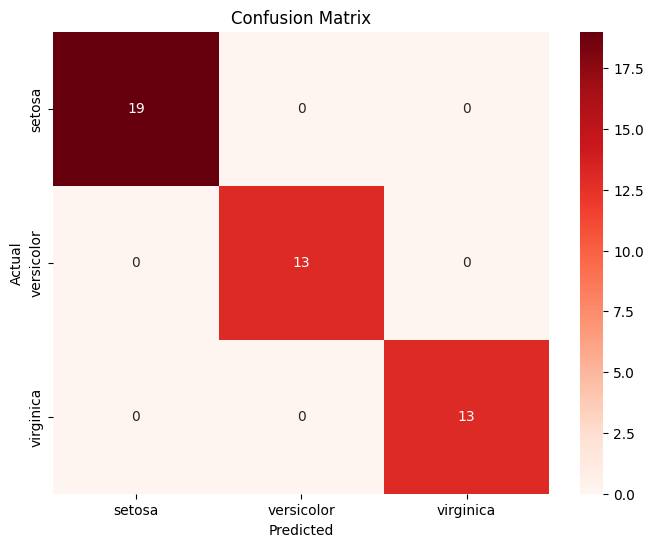

In [7]:
# Visualizing confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report : \n", report)

Classification Report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [9]:
# --- Visualizing Decision Tree (Won't run in vs code because it requires graphviz installation from its website)
# from sklearn.tree import export_graphviz
# import graphviz
# dot_data = export_graphviz(classifier, out_file=None, 
#                             feature_names=iris.feature_names, 
#                             class_names=iris.target_names, 
#                             filled=True, rounded=True, 
#                             special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph.render("iris_decision_tree")

In [15]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

In [20]:
corr1 = iris_df.corr()

In [21]:
print(corr1)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    Target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
Target                     0.956547  1.000000  


<Axes: >

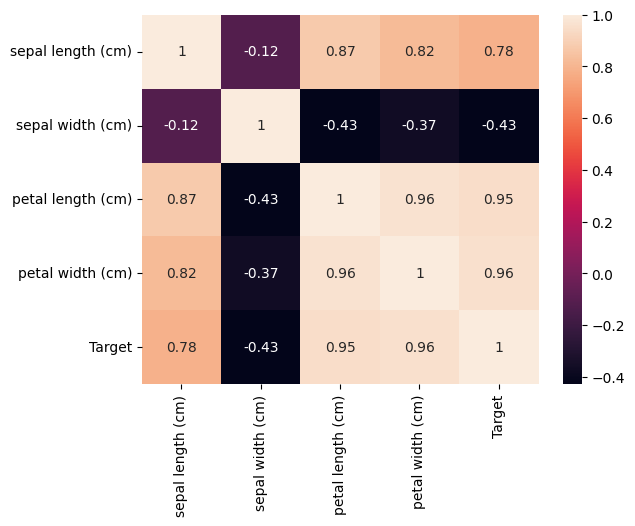

In [22]:
sns.heatmap(corr1, annot= True)

**NOTE:** From the corelation matrix, it is evident that features like *petal width (cm)*, *petal length (cm)* and *sepal length (cm)* have high influence on target variables

In [32]:
# collecting required features and targets from dataframe
new_features = iris_df[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']]
new_targets = iris_df['Target']

In [33]:
import numpy as np
new_targets = np.array(new_targets).reshape(-1,1) # creating a column

In [34]:
# test train split
feature_train, feature_test, target_train, target_test = train_test_split(new_features, new_targets, test_size=0.3, random_state=42)

In [36]:
classifier_new = DecisionTreeClassifier(criterion='entropy')
classifier_new.fit(feature_train, target_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
# Evaluation of new model
pred = classifier_new.predict(feature_test)
accuracy_new = accuracy_score(target_test, pred)
print("Accuracy of New Model: ", accuracy_new)

Accuracy of New Model:  1.0


In [41]:
# Creating a confusion matrix for new resulsts
conf_matrix_new = confusion_matrix(target_test, pred)

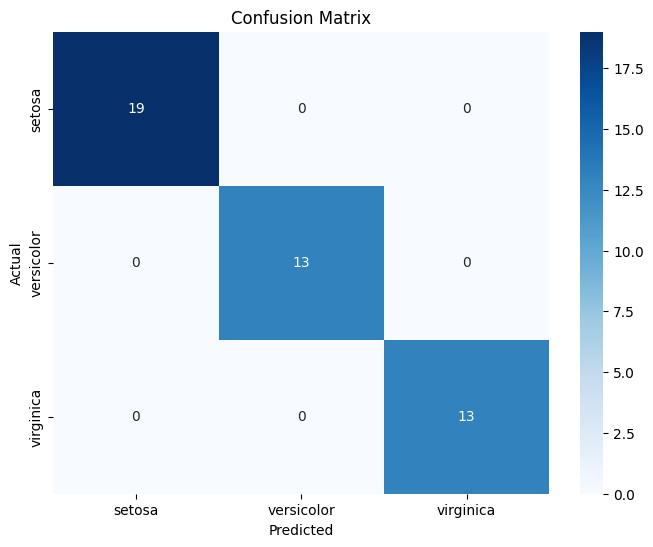

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues",
xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Classification report
report = classification_report(target_test, pred, target_names=iris.target_names)
print("Classification Report : \n", report)

Classification Report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

